In [1]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import make_scorer

In [2]:
import pandas as pd
import numpy as np

In [3]:
def make_auc_pr(y_true, y_pred):
    precision, recall, _ = metrics.precision_recall_curve(y_true, y_pred)
    res = metrics.auc(recall, precision)
    return res
auc_pr = make_scorer(make_auc_pr)

In [4]:
rf = RandomForestClassifier()

In [4]:
class_weight = {False: 1.,
                True: 1.2}

In [5]:
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10], 
               'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
               'class_weight': ["balanced", class_weight]}

In [7]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=20902490)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 2, cv = cv, 
                               verbose=3, random_state=20902490, scoring={'roc_auc': 'roc_auc', 'auc_pr': auc_pr, 'f1': 'f1'},  
                               n_jobs=1, refit = 'auc_pr')

In [6]:
X_train = pd.read_csv("X_train.csv.gz", header=None)
X_train = X_train.values
print(X_train)

[[6.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.84017901e-01
  7.18000000e+02 2.02000000e+02]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 4.84200328e-01
  3.65000000e+02 3.38000000e+02]
 [1.20000000e+01 0.00000000e+00 0.00000000e+00 ... 4.73467550e-01
  7.18000000e+02 1.79500000e+03]
 ...
 [9.20922902e+00 0.00000000e+00 0.00000000e+00 ... 4.77037648e-01
  6.29209229e+02 8.17907710e+01]
 [1.03861580e+01 0.00000000e+00 0.00000000e+00 ... 4.32597445e-01
  7.08227684e+02 9.19307902e+01]
 [3.27461130e+00 0.00000000e+00 0.00000000e+00 ... 4.69333429e-01
  4.33000000e+02 7.22708117e+02]]


In [7]:
y_train = pd.read_csv("y_train.csv.gz", header=None)
y_train = y_train.values.ravel()
print(y_train)

[False False False ...  True  True  True]


In [10]:
X_train.shape

(539901, 48)

In [19]:
def fit_model(rf):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=20902490)
    scores = cross_validate(rf, X_train, y_train, scoring={'roc_auc': 'roc_auc',
                                                            'auc_pr': auc_pr,
                                                            'f1': 'f1'}, cv=cv, n_jobs=-1)
    return scores
def find_mean(scores):
    print("test_roc_auc: ", scores['test_roc_auc'].mean())
    print("test_auc_pr: ", scores['test_auc_pr'].mean())    
    print("f1: ", scores['test_f1'].mean())    

In [13]:
%%time
rf = RandomForestClassifier(class_weight=class_weight, bootstrap=False)
find_mean(fit_model(rf))

test_roc_auc:  0.9958320596602113
test_auc_pr:  0.9852140447696396
CPU times: user 421 ms, sys: 1.99 s, total: 2.41 s
Wall time: 5min 56s
0.9848884363832827
0.986270697368472
0.9853961621596794
0.9849411962656242
0.9852693009646776
0.9851433601675232
0.9850860470945382
0.9843073726600624
0.9858069100295492
0.9850309646029861


In [17]:
%%time
rf = RandomForestClassifier(class_weight="balanced", bootstrap=False)
find_mean(fit_model(rf))

test_roc_auc:  0.9958033119273203
test_auc_pr:  0.9851803369292493
CPU times: user 454 ms, sys: 2.56 s, total: 3.01 s
Wall time: 7min 25s


In [18]:
%%time
rf = RandomForestClassifier(class_weight=class_weight, bootstrap=False, max_features="log2")
find_mean(fit_model(rf))

test_roc_auc:  0.9958371010848825
test_auc_pr:  0.9852015980205497
CPU times: user 401 ms, sys: 2.05 s, total: 2.45 s
Wall time: 5min 26s


In [9]:
%%time
rf = RandomForestClassifier(class_weight=class_weight, bootstrap=False, n_estimators=50)
find_mean(fit_model(rf))

test_roc_auc:  0.9953969353088418
test_auc_pr:  0.9850944579349346
CPU times: user 385 ms, sys: 1.47 s, total: 1.86 s
Wall time: 4min 5s


In [10]:
%%time
rf = RandomForestClassifier(class_weight=class_weight, bootstrap=False, n_estimators=40)
find_mean(fit_model(rf))

test_roc_auc:  0.9951009283717644
test_auc_pr:  0.9850979674715667
CPU times: user 313 ms, sys: 1.32 s, total: 1.63 s
Wall time: 2min 25s


In [13]:
%%time
rf = RandomForestClassifier(class_weight=class_weight, bootstrap=False, n_estimators=80, max_features="log2")
find_mean(fit_model(rf))

test_roc_auc:  0.9957325369020325
test_auc_pr:  0.9851804940420884
CPU times: user 355 ms, sys: 1.58 s, total: 1.93 s
Wall time: 5min 39s


In [14]:
%%time
rf = RandomForestClassifier(class_weight=class_weight, bootstrap=False, min_samples_split=4, max_features="log2")
find_mean(fit_model(rf))

test_roc_auc:  0.9957639438367799
test_auc_pr:  0.9852021567392093
CPU times: user 389 ms, sys: 1.5 s, total: 1.89 s
Wall time: 6min 53s


In [17]:
%%time
rf = RandomForestClassifier(class_weight=class_weight, bootstrap=False, min_samples_split=3, max_features="log2")
find_mean(fit_model(rf))

test_roc_auc:  0.9958371557169794
test_auc_pr:  0.9853128643354252


KeyError: 'f1'

In [18]:
%%time
rf = RandomForestClassifier(class_weight=class_weight, bootstrap=False, min_samples_split=3, max_features="log2", max_depth=20)
scores = fit_model(rf)
print(scores)

{'fit_time': array([346.67877436, 347.49304032, 359.11962438, 360.48259306,
       361.86490345, 364.46322036, 360.89819956, 361.75755143,
       359.79783368, 346.64535046]), 'score_time': array([2.33261895, 2.22300458, 2.25769258, 2.15511036, 2.18002033,
       2.13830256, 2.26030898, 2.16880941, 2.17769766, 2.28469372]), 'test_roc_auc': array([0.99209457, 0.99287761, 0.99229443, 0.99274261, 0.99260466,
       0.99284065, 0.99310791, 0.99271127, 0.99246793, 0.99212269]), 'test_auc_pr': array([0.97563882, 0.9767345 , 0.97674291, 0.97729112, 0.97648223,
       0.97629069, 0.97803127, 0.97681631, 0.97738445, 0.97703925]), 'test_f1': array([0.96355348, 0.96521334, 0.96528351, 0.96595844, 0.96520635,
       0.96535836, 0.96767105, 0.96586872, 0.96561234, 0.96602353])}
CPU times: user 387 ms, sys: 1.5 s, total: 1.89 s
Wall time: 6min 8s


In [20]:
find_mean(scores)

test_roc_auc:  0.9925864335844444
test_auc_pr:  0.9768451560413192
f1:  0.9655749111422317


In [21]:
%%time
rf = RandomForestClassifier(class_weight=class_weight, bootstrap=False, min_samples_split=3, max_features="log2", max_depth=50)
find_mean(fit_model(rf))

test_roc_auc:  0.995805257018924
test_auc_pr:  0.9852732771808717
f1:  0.9743574301877855
CPU times: user 410 ms, sys: 1.5 s, total: 1.91 s
Wall time: 7min 13s


In [26]:
%%time
rf = RandomForestClassifier(class_weight=class_weight, bootstrap=False, min_samples_split=3, max_features="log2", min_samples_leaf=5)
find_mean(fit_model(rf))

test_roc_auc:  0.995076792011487
test_auc_pr:  0.9841558670347463
f1:  0.9723508964423845
CPU times: user 391 ms, sys: 1.59 s, total: 1.98 s
Wall time: 6min 51s


In [27]:
final_rf = RandomForestClassifier(class_weight=class_weight, bootstrap=False, min_samples_split=3, max_features="log2")
final_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight={False: 1.0, True: 1.2},
                       max_features='log2', min_samples_split=3)

### feature importance

In [31]:
importances = final_rf.feature_importances_
print(importances)

[0.02232983 0.00705508 0.00177691 0.0047551  0.00874507 0.00757402
 0.01182155 0.0026115  0.00785909 0.0081648  0.01679853 0.00247372
 0.00498238 0.00504316 0.00400133 0.00582615 0.0100191  0.00442756
 0.00639678 0.00142602 0.00318625 0.01628252 0.02600239 0.0234704
 0.02006302 0.03584937 0.05367661 0.05910026 0.04592681 0.00139934
 0.03496965 0.00424059 0.00069167 0.01938577 0.01711769 0.04576852
 0.03841058 0.02611277 0.04252081 0.03378079 0.06647566 0.04586348
 0.05395821 0.03179608 0.03223708 0.0366299  0.01830949 0.0226866 ]


In [32]:
df_train = pd.read_csv("af2_dataset_training_labeled.csv.gz", index_col=0)
feature_names = df_train.columns[:-1]
print(feature_names)

Index(['annotation_sequence', 'feat_A', 'feat_C', 'feat_D', 'feat_E', 'feat_F',
       'feat_G', 'feat_H', 'feat_I', 'feat_K', 'feat_L', 'feat_M', 'feat_N',
       'feat_P', 'feat_Q', 'feat_R', 'feat_S', 'feat_T', 'feat_V', 'feat_W',
       'feat_Y', 'annotation_atomrec', 'feat_PHI', 'feat_PSI', 'feat_TAU',
       'feat_THETA', 'feat_BBSASA', 'feat_SCSASA', 'feat_pLDDT', 'feat_DSSP_H',
       'feat_DSSP_B', 'feat_DSSP_E', 'feat_DSSP_G', 'feat_DSSP_I',
       'feat_DSSP_T', 'feat_DSSP_S', 'feat_DSSP_6', 'feat_DSSP_7',
       'feat_DSSP_8', 'feat_DSSP_9', 'feat_DSSP_10', 'feat_DSSP_11',
       'feat_DSSP_12', 'feat_DSSP_13', 'coord_X', 'coord_Y', 'coord_Z',
       'entry', 'entry_index'],
      dtype='object')


In [35]:
feature_names = feature_names.drop(['annotation_atomrec'])

In [36]:
forest_importances = pd.Series(importances, index=feature_names)

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

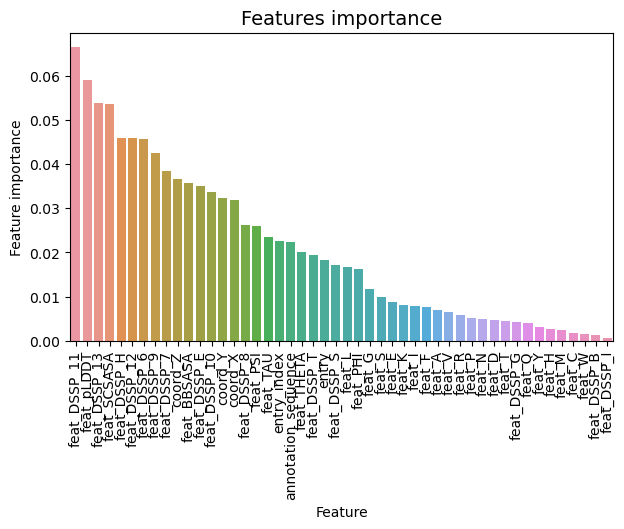

In [54]:
tmp = pd.DataFrame({'Feature': feature_names, 'Feature importance': forest_importances})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

In [55]:
tmp

,Feature,Feature importance
feat_DSSP_11,feat_DSSP_11,0.066476
feat_pLDDT,feat_pLDDT,0.059100
feat_DSSP_13,feat_DSSP_13,0.053958
feat_SCSASA,feat_SCSASA,0.053677
feat_DSSP_H,feat_DSSP_H,0.045927
feat_DSSP_12,feat_DSSP_12,0.045863
feat_DSSP_6,feat_DSSP_6,0.045769
feat_DSSP_9,feat_DSSP_9,0.042521
feat_DSSP_7,feat_DSSP_7,0.038411
coord_Z,coord_Z,0.036630


### Save the model

In [28]:
import pickle
filename = 'kebing_model.sav'
pickle.dump(final_rf, open(filename, 'wb'))

### predict

In [ ]:
final_rf.predict()

In [30]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_train, y_train)
print(result)

0.9999962956171594
